# Séries Temporais em Python


## Séries Temporais: Definição e Exemplos

**Definição:**
- Séries temporais são sequências de dados coletados ou registrados em intervalos de tempo regulares.
- Exemplos comuns incluem preços de ações, dados climáticos, vendas mensais, entre outros.

**Exemplo com dados reais:**


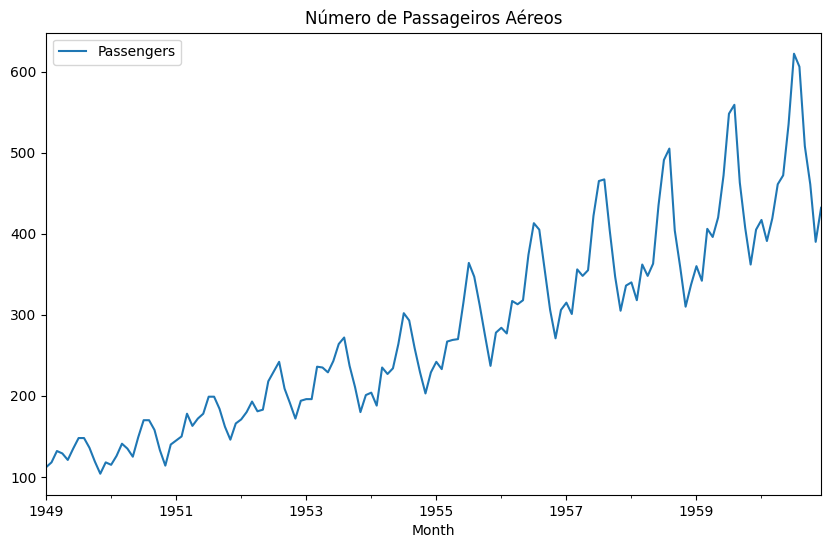

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando um conjunto de dados clássico: AirPassengers
url = (
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
)
df = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

# Visualizando a série temporal
df.plot(title="Número de Passageiros Aéreos", figsize=(10, 6))
plt.show()


## Frequência, Período e Amostragem

**Frequência:**
- Refere-se ao intervalo de tempo entre cada ponto de dados em uma série temporal (diário, mensal, anual, etc.).

**Período:**
- O tempo necessário para completar um ciclo completo de dados.

**Amostragem:**
- Processo de coletar dados em intervalos regulares.

**Exemplo:**


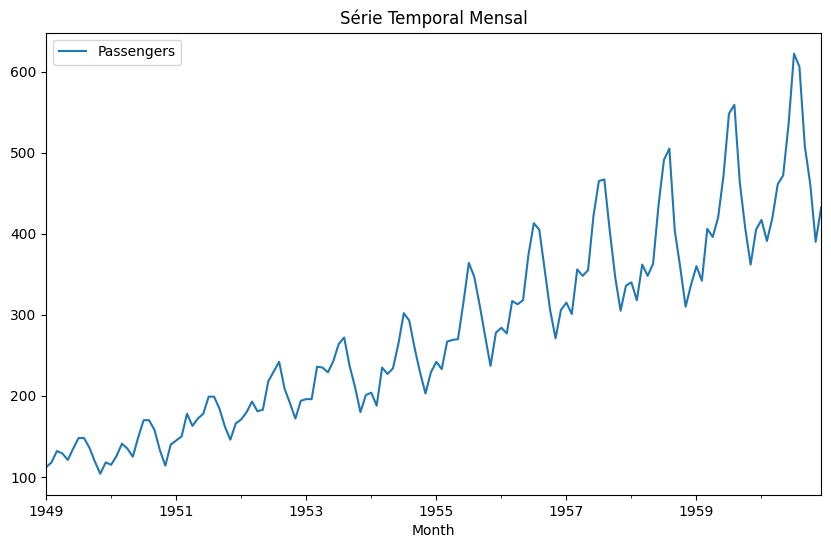

In [2]:
# Amostragem mensal no conjunto de dados de passageiros aéreos
df_monthly = df.resample("M").mean()
df_monthly.plot(title="Série Temporal Mensal", figsize=(10, 6))
plt.show()


## Sazonalidade

**Definição:**
- Padrões que se repetem em intervalos regulares de tempo, como estações do ano ou dias da semana.

**Exemplo:**


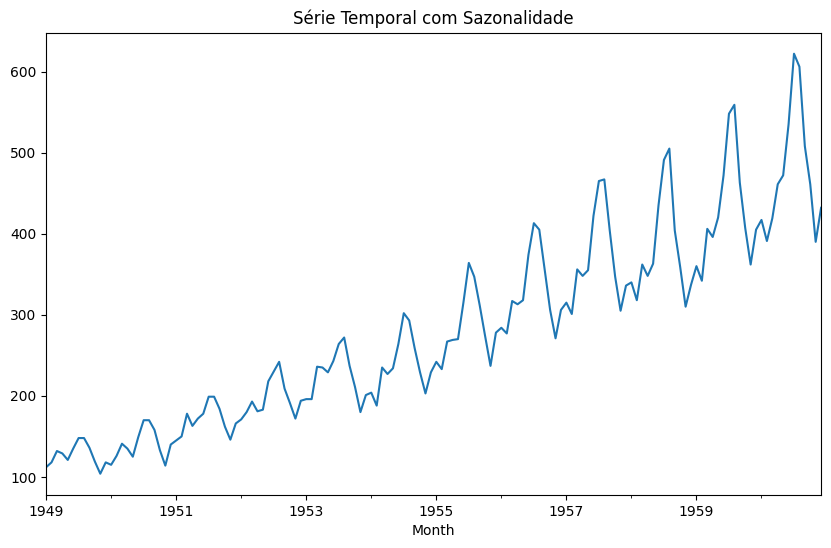

In [3]:
# Visualizando a sazonalidade na série temporal de passageiros aéreos
df["Passengers"].plot(title="Série Temporal com Sazonalidade", figsize=(10, 6))
plt.show()


## Estacionariedade e Tendência

**Estacionariedade:**
- Uma série temporal é estacionária se suas propriedades estatísticas, como média e variância, não mudarem ao longo do tempo.

**Tendência:**
- Refere-se ao movimento de longo prazo nos dados.

**Exemplo:**


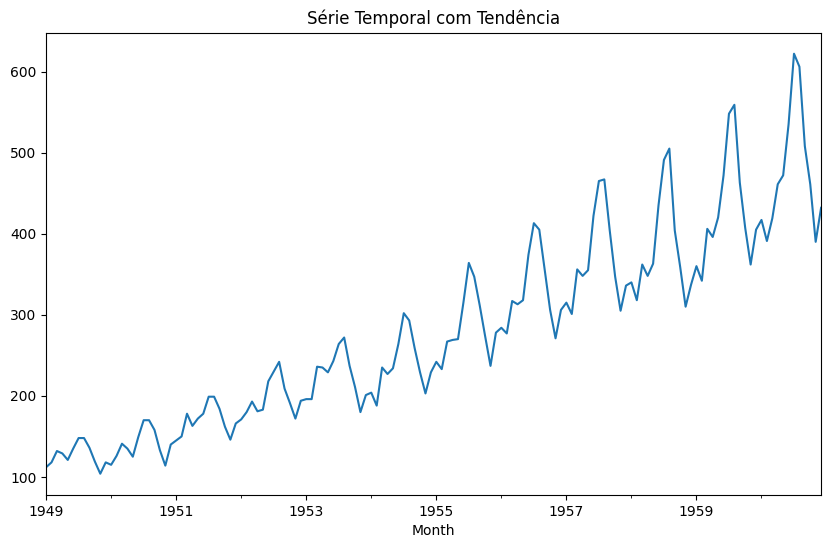

In [4]:
# Visualizando a tendência na série temporal de passageiros aéreos
df["Passengers"].plot(title="Série Temporal com Tendência", figsize=(10, 6))
plt.show()


## Autocorrelação

**Definição:**
- A autocorrelação mede a correlação de uma série temporal com ela mesma em diferentes atrasos (lags).

**Exemplo:**


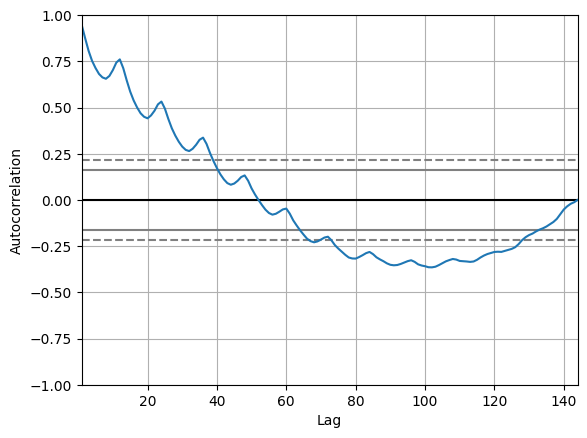

In [5]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df["Passengers"])
plt.show()


## Técnicas de Correção de Estacionariedade

**Diferença:**
- Subtrai o valor anterior do valor atual.

**Exemplo:**


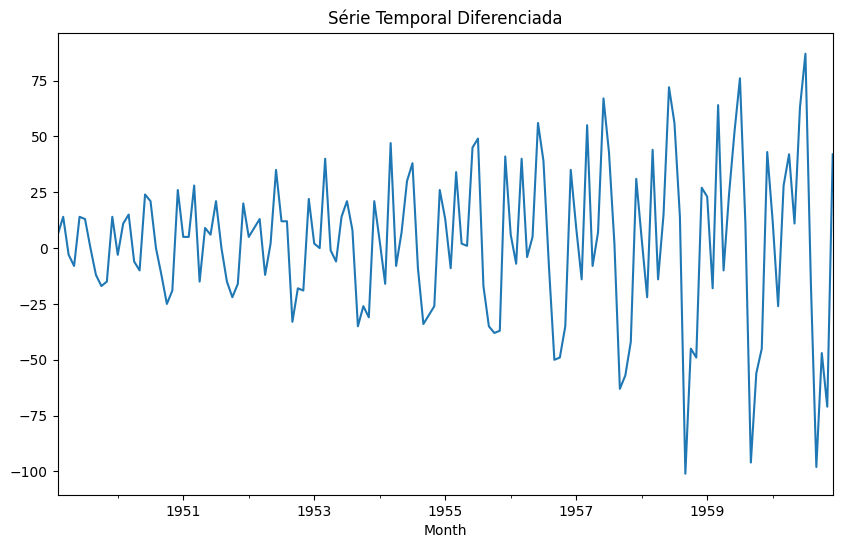

In [6]:
# Aplicando diferenciação
df_diff = df["Passengers"].diff().dropna()
df_diff.plot(title="Série Temporal Diferenciada", figsize=(10, 6))
plt.show()


**Transformação Logarítmica:**
- Aplica o logaritmo aos dados para estabilizar a variância.

**Exemplo:**


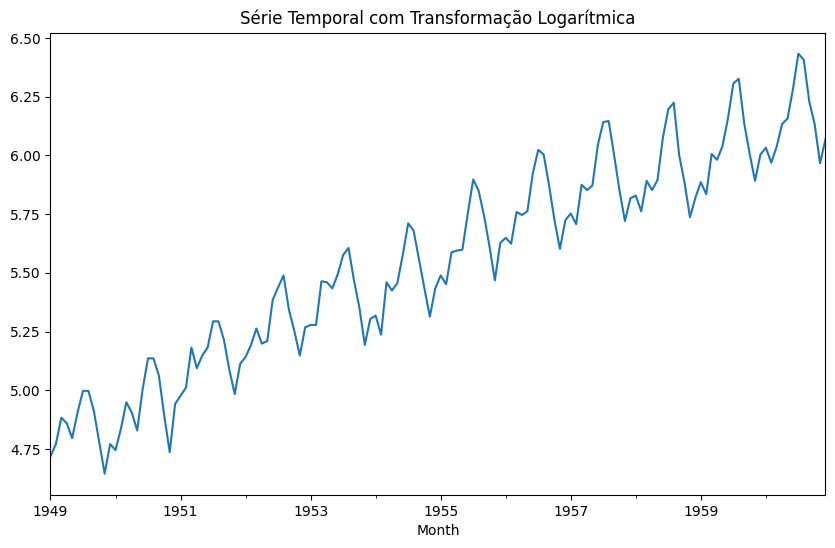

In [7]:
import numpy as np

df_log = np.log(df["Passengers"])
df_log.plot(title="Série Temporal com Transformação Logarítmica", figsize=(10, 6))
plt.show()


## Técnicas de Janela Deslizante

**Média Móvel:**
- Suaviza os dados calculando a média dos pontos em uma janela deslizante.

**Exemplo:**


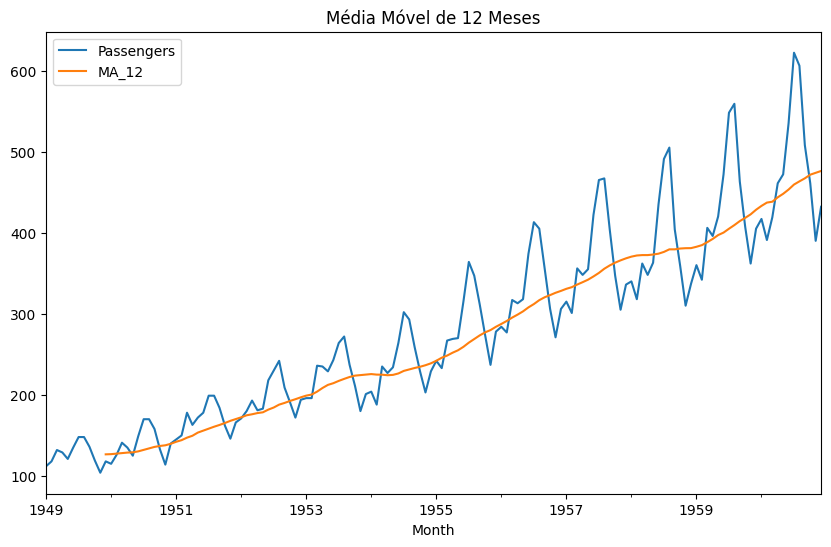

In [8]:
df["MA_12"] = df["Passengers"].rolling(window=12).mean()
df[["Passengers", "MA_12"]].plot(title="Média Móvel de 12 Meses", figsize=(10, 6))
plt.show()


## Modelos Simples para Predição

### Média Móvel

**Definição:**
- Suaviza os dados calculando a média dos pontos em uma janela deslizante.

**Exemplo:**


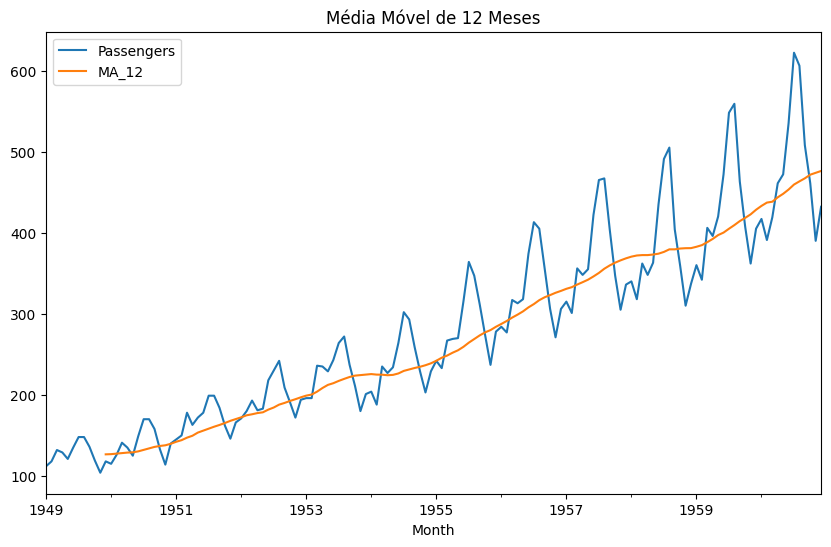

In [9]:
df["MA_12"] = df["Passengers"].rolling(window=12).mean()
df[["Passengers", "MA_12"]].plot(title="Média Móvel de 12 Meses", figsize=(10, 6))
plt.show()


### Regressão Linear

**Exemplo:**


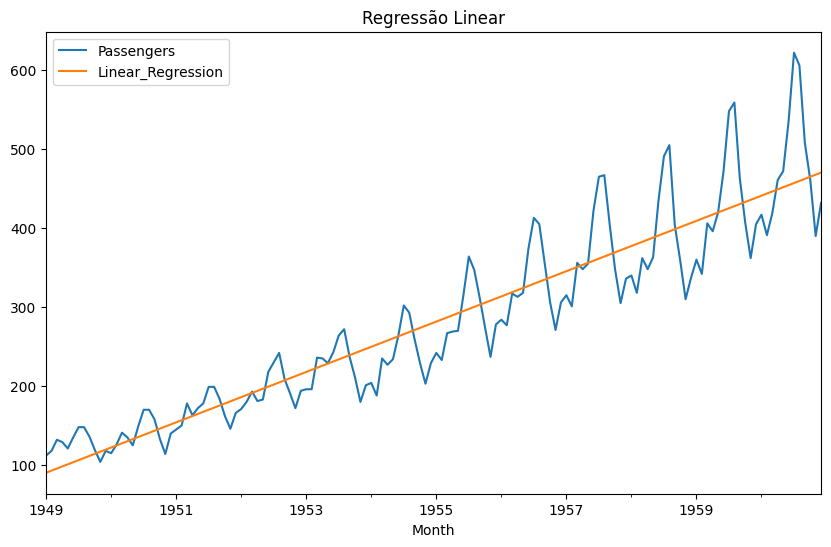

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparando os dados
X = np.arange(len(df)).reshape(-1, 1)
y = df["Passengers"].values

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X, y)
df["Linear_Regression"] = model.predict(X)

# Plotando os resultados
df[["Passengers", "Linear_Regression"]].plot(title="Regressão Linear", figsize=(10, 6))
plt.show()


### ARIMA

**Exemplo:**


c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, Fut

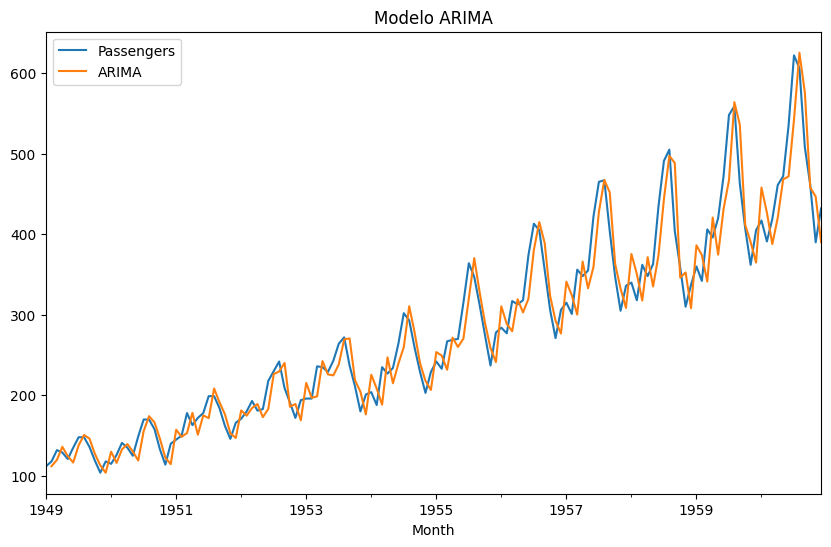

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustando o modelo ARIMA
model = ARIMA(df["Passengers"], order=(5, 1, 0))
model_fit = model.fit()
df["ARIMA"] = model_fit.predict(start=1, end=len(df), typ="levels")

# Plotando os resultados
df[["Passengers", "ARIMA"]].plot(title="Modelo ARIMA", figsize=(10, 6))
plt.show()


### SARIMA

**Exemplo:**


c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


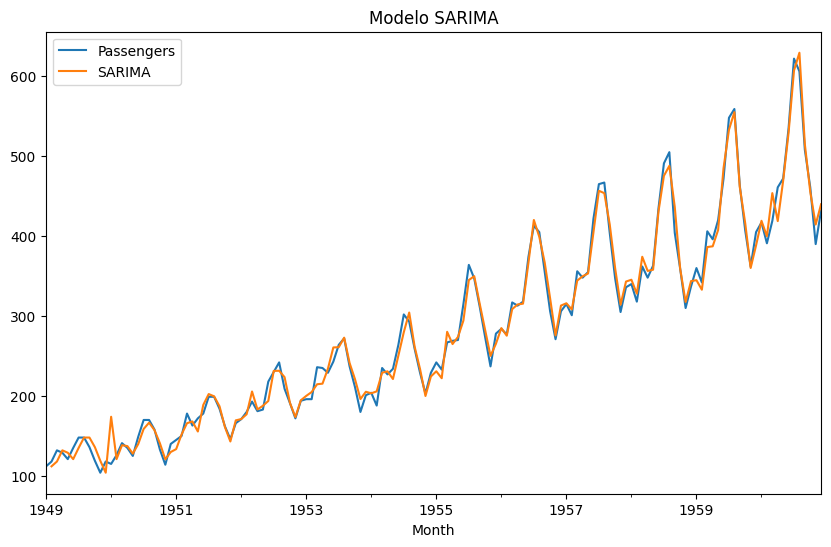

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustando o modelo SARIMA
model = SARIMAX(df["Passengers"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
df["SARIMA"] = model_fit.predict(start=1, end=len(df))

# Plotando os resultados
df[["Passengers", "SARIMA"]].plot(title="Modelo SARIMA", figsize=(10, 6))
plt.show()